# TP 5 Réseaux de neurones - Multi classification et Propagation en avant
Dans ce TP, nous aimerions faire une classification multiclasse. Pour ce faire, nous allons comparer entre une classification utilisant la regression logistique, et une classification en utilisant les réseaux de neurones.

L'ensemble de données que nous allons utiliser est le même que celui utilisé durant le TP1, i.e. les images de chiffres manuscrits.


# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import cv2 

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(5000, 401)

Dans ces données (data), les 400 premières colonnes representent les pixels de l'image (20x20), la dernière colonne represente la classe de l'image (chiffres de 0 à 9). (http://yann.lecun.com/exdb/mnist/)

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,:-1])) # creation de la matrice de caracteristiques
y=data[:,-1] # la colonne de la valeur cible 'la classe'
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)   # pour s'alligner correctement avec X

In [4]:
print('X', X.shape ,' y ', y.shape)

X (5000, 401)  y  (5000, 1)


Visualisation aléatoire de quelques données

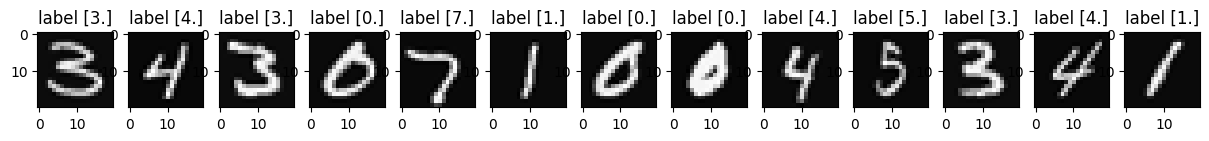

In [5]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c,1:].reshape((20, 20))  # extrait la ligne de X a partir de la 2eme colonne puisque 1st= intercept
    a=np.transpose(a)
    #plt.subplot(2,7,i+1)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(y[c]))
    plt.imshow(a,cmap='gray')

# Partie 1, régression logistique
Dans cette partie, nous aimerions utiliser la régression logistique pour classifier nos images

Rappelons que la régression logistique nous donne la probabilité d'appartenance (oui ou non) à la classe 1 (elle permet une classification binaire).

Pour étendre la régression logistique à une multi-classification, nous allons utiliser une stratégie 1 contre tous.

Nos paramètres $\theta$ seront donc une matrice avec un nombre de lignes égale au nombre de classes, et avec un nombre de colones égale au nombre des caractéristiques + 1 (chaque ligne de la matrice $\theta$ correspond aux paramètres d'un classifieur.

In [6]:
#Donc la matrice theta aura 10 lignes (nombre de classes)
#et 400+1 colonnes ( 400 caracteristiques et 1 intercept) 

#On va utiliser La strategie 1 contre tous -> vous allez entraîner
# 10 classifieurs binaires (un pour chaque classe)

In [7]:
def lrCostFunction (X, y, initial_theta, alpha, MaxIter,lambda_):
    # dans cette fonction vous devez appliquer la regression logistique avec tout ce que ceci implique
    # calcul du coût, minimisation du coût avec descente du gradient, et retour des paramètres theta pour une classe

    m, n = X.shape # m : le nombre d'exemples , n: le nombre de caracteristiques
    
    theta = initial_theta.reshape((n, 1))
    J_history = np.zeros((MaxIter, 1))  #Pour stocker les valeurs du cout
    
    for i in range(MaxIter):
        # Calcul de l'hypothese 'h' en appliquant la sigmoid
        z = np.dot(X, theta)
        h = 1 / (1 + np.exp(-z))
        

        #calcul du cout en utilisant la formule du cout avec regularisation
        J = (-1/m) * np.sum((y * np.log(h)) + ((1-y) * np.log(1-h))) + (lambda_/(2*m)) * np.sum(np.square(theta[1:]))
        J_history[i] = J

        #Calcul du gradient :
        gradient = (1/m) * np.dot(X.T, (h - y))
        gradient[1:] = gradient[1:] + (lambda_/m) * theta[1:]  # la regularisation (penalite) est ajoutee pour le par autre que l'intercept
        
        #mise a jour de theta
        theta = theta - alpha * gradient
    
    return theta, J_history

In [8]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

In [9]:
def predictOnveVsAll (all_theta, X):
    # ici en utilisant les paramètres calculés par la régression logisitique, 
    # nous aimerions retourner les etiquettes predites
    
    # Ici chaque classifieur retournera de probabilité, il faudra choisir 
    # la probabilité maximale 
    # de tous les classifieurs d'un exemple donné
    # répeter pour tous les exmemples


    # Calculer la probabilité de chaque classe pour chaque exemple
    # probs est donc une matrice où chaque ligne correspond à un exemple et chaque colonne correspond à la probabilité prédite pour cette classe
    probs = sigmoid(X.dot(all_theta.T))
    # Choisir la classe ayant la probabilité la plus élevée pour chaque exemple
    y_pred = np.argmax(probs, axis=1)
    return y_pred.reshape((X.shape[0], 1))  # on redimensionne le tableau unidimentionnel en une matrice avec une suele colonne

In [10]:
classes= np.unique(y)
number_classes=classes.shape[0]
all_theta = np.zeros((number_classes, X.shape[1]))
all_theta.shape

(10, 401)

La forme de all_theta après le 1 ème classifieur est (10, 401)


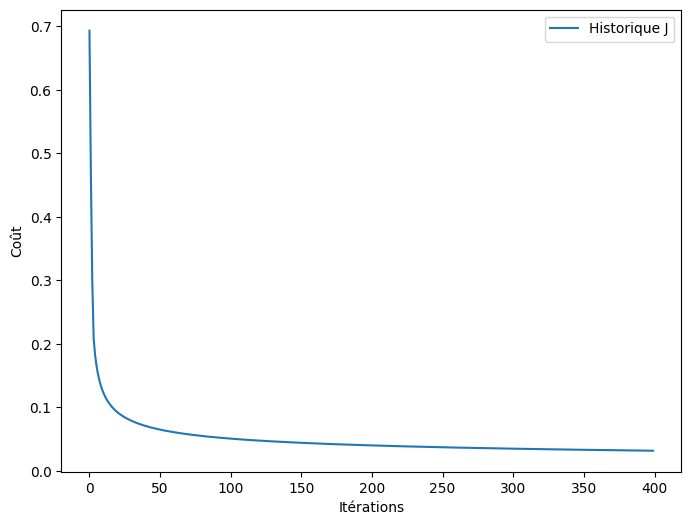

La forme de all_theta après le 2 ème classifieur est (10, 401)


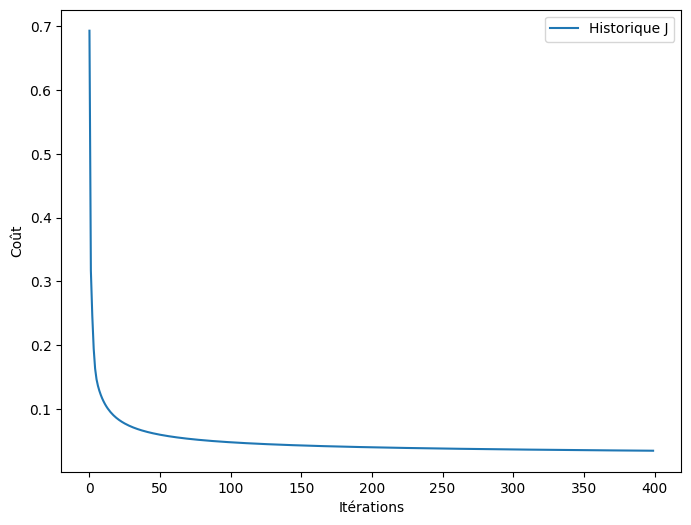

La forme de all_theta après le 3 ème classifieur est (10, 401)


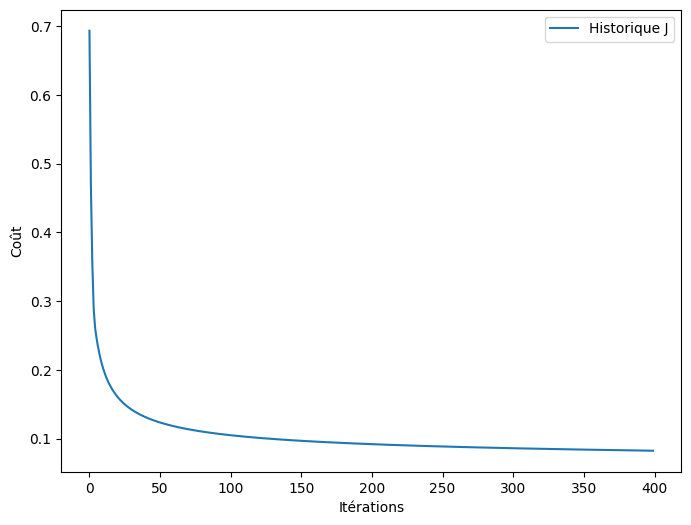

La forme de all_theta après le 4 ème classifieur est (10, 401)


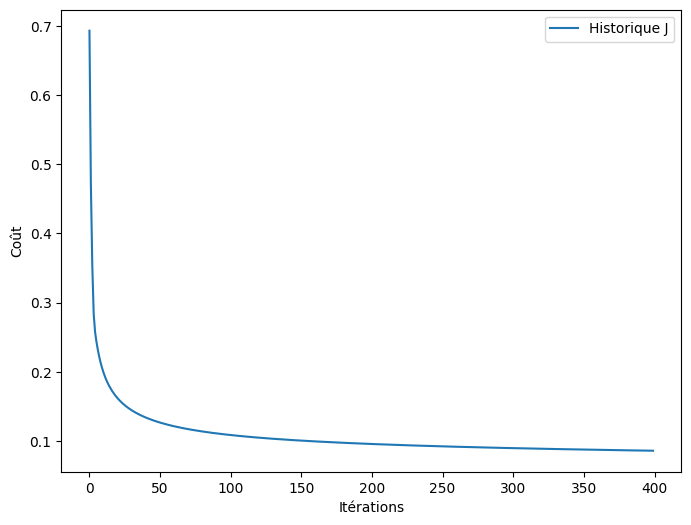

La forme de all_theta après le 5 ème classifieur est (10, 401)


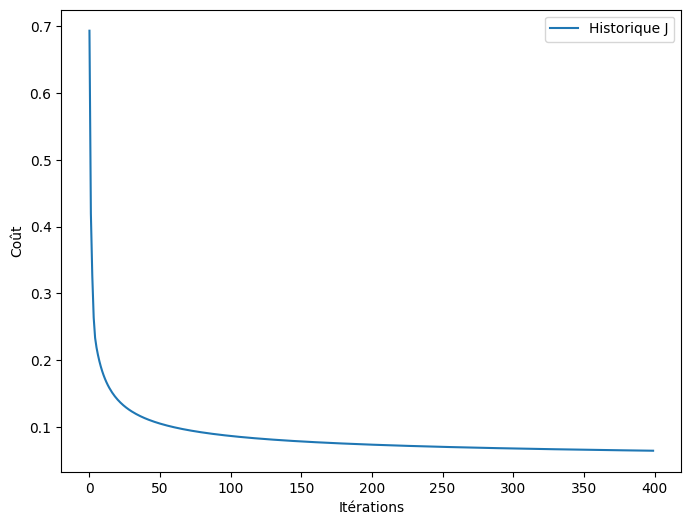

La forme de all_theta après le 6 ème classifieur est (10, 401)


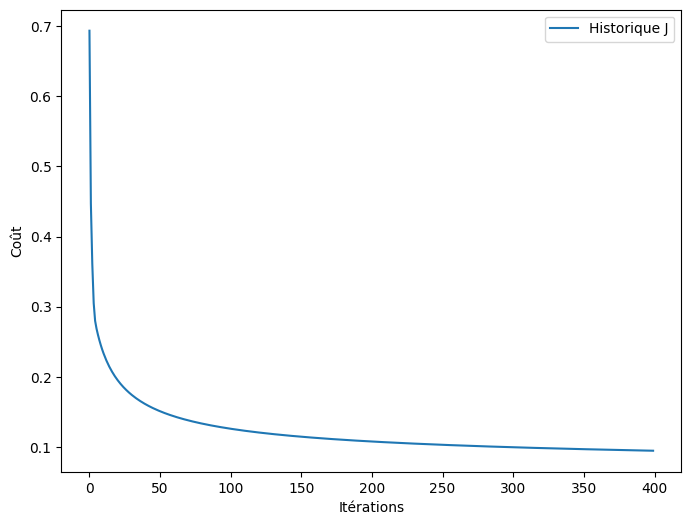

La forme de all_theta après le 7 ème classifieur est (10, 401)


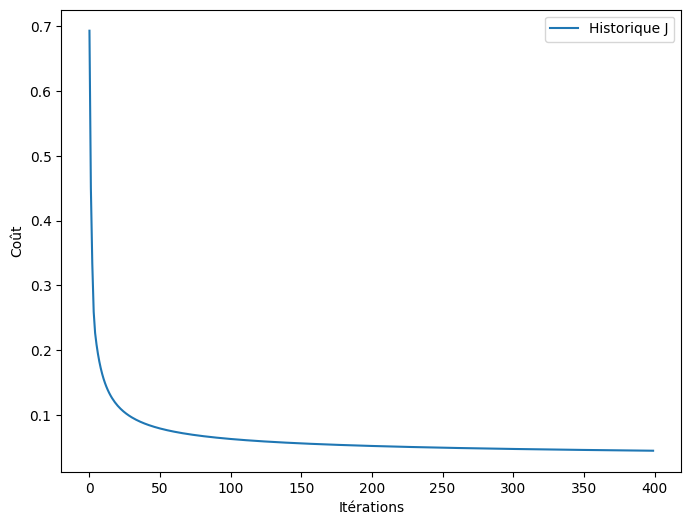

La forme de all_theta après le 8 ème classifieur est (10, 401)


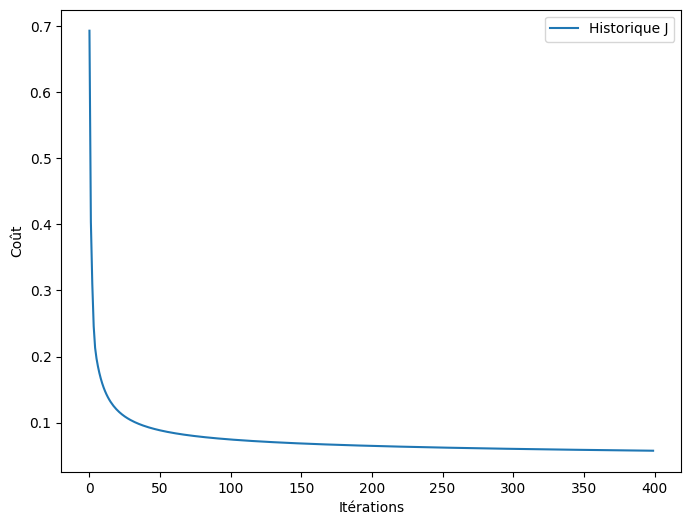

La forme de all_theta après le 9 ème classifieur est (10, 401)


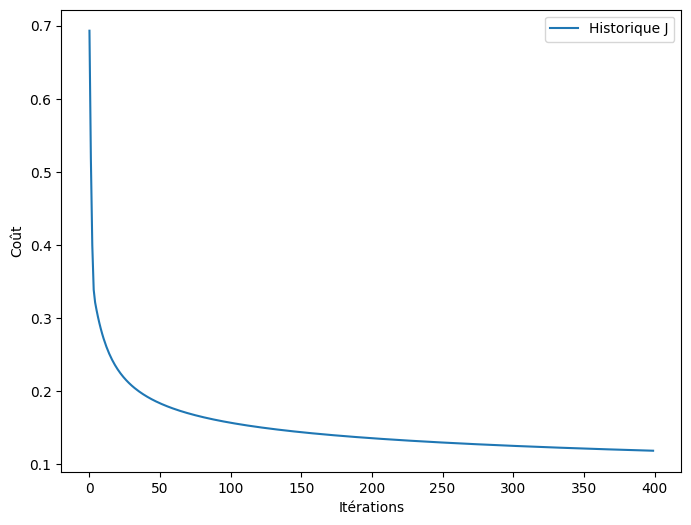

La forme de all_theta après le 10 ème classifieur est (10, 401)


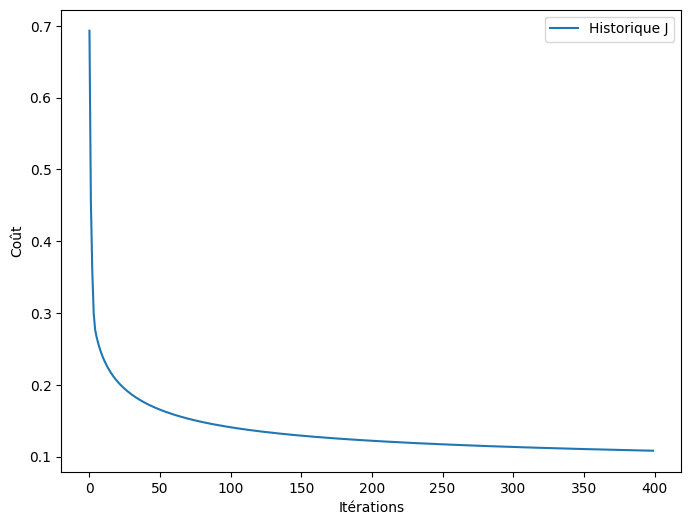

In [23]:
MaxIter= 400
lambda_= 0.1
alpha = 0.6  # val de alpha essayees : 0.01 0.05 0.1 0.6 0.3 0.4 0.5
# parametres initiaux pour chaque classifieur initialise a zero
initial_theta=np.zeros((X.shape[1], 1))
for i in range (number_classes):
     # appel pour chaque classifieur
    theta, J_history = lrCostFunction(X,(y==classes[i]).astype(int),initial_theta,alpha, MaxIter,lambda_)
    #La partie (y==classes[i]).astype(int) cree un vecteur de même longueur que y, où chaque element est 1 si l'etiquette correspond a la classe actuelle classes[i], et 0 sinon.
    all_theta[i,:] = theta.T
    #affichage 
    print("La forme de all_theta après le {} ème classifieur est {}".format(i+1, all_theta.shape))
    # Affichage de l'historique J
    plt.figure(figsize=(8, 6))
    plt.plot(J_history, label='Historique J')
    plt.xlabel('Itérations')
    plt.ylabel('Coût')
    plt.legend()
    plt.show()

In [12]:
y_pred = predictOnveVsAll(all_theta, X)

# Qualité du classifieur RL

Prédire des valeurs de y

Ici il serait interessant de calculer la précision de notre classifieur

Essayons de calculer ça avec 

moyenne(y==y-pred) * 100

Ceci donnera un pourcentage de precision

In [13]:
precision = np.mean(y==y_pred)*100  #91.74 0.8  #0.6 91.28  #0.5 91.04 04 90.7
precision 


91.28

### Petit Rappel :
Rappel :est une mesure de la capacité d'un modèle à identifier correctement les instances positives.
 Il se calcule comme le nombre d'instances positives correctement prédites divisé par le nombre total d'instances positives réelles dans l'ensemble de données. (VP/VP+FN)

Precision: est une mesure de l'exactitude d'un modèle de classification. 
 Elle se calcule comme le nombre d'instances correctement classées comme positives divisé par le nombre total d'instances classées comme positives, qu'elles soient correctes ou incorrectes


Précision: 0.9128
Rappel: 0.974


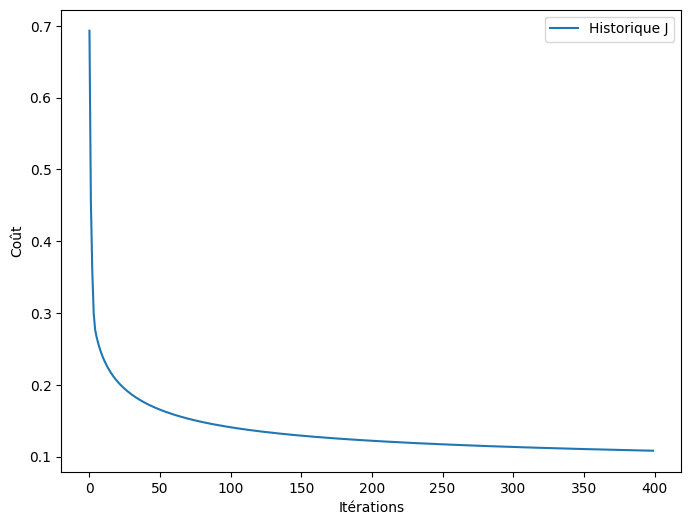

In [14]:
# Affichage des résultats
precision = np.sum(y_pred.ravel() == y.ravel()) / len(y)
recall = np.sum((y_pred.ravel() == 1) & (y.ravel() == 1)) / np.sum(y.ravel() == 1)
print("Précision:", precision)
print("Rappel:", recall)

# Affichage de l'historique J
plt.figure(figsize=(8, 6))
plt.plot(J_history, label='Historique J')
plt.xlabel('Itérations')
plt.ylabel('Coût')
plt.legend()
plt.show()

# Coût initial
#initial_cost = J_history[0]
#print("Coût initial:", initial_cost)

# Coût final
#final_cost = J_history[-1]
#print("Coût final:", final_cost)



Les valeurs hors de la diagonale principale représentent les erreurs de classification.

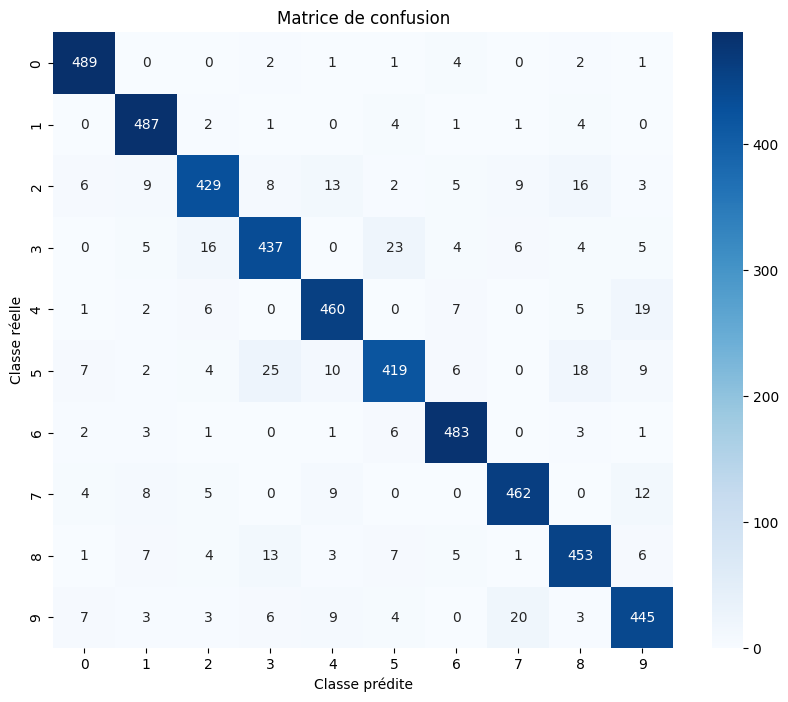

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y.flatten(), y_pred.flatten())

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Matrice de confusion')
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.show()



# Partie 2: Réseaux de neurones
Pour cette partie, nous choisissons une réseau simple:

- une couche d'entrée avec 400 noeuds (20 x 20 pixels) + le biais
- une couche cachée avec 25 noeuds
- une couche de sortie avec 10 noeuds (nombre de classes)

In [16]:
# poids de la couche 1
W1 = np.genfromtxt('W1.csv', delimiter=',', dtype=float)
W1.shape


#Chaque neurone de la coyche cachee a 401 poids associés 
#(400 pour les connexions avec les neurones de la couche d'entrée et 1 pour le biais)

(25, 401)

In [17]:
# poids de la couche 2
W2 = np.genfromtxt('W2.csv', delimiter=',', dtype=float)
W2.shape

(10, 26)

In [18]:
input_layer_size  = 400 
hidden_layer_size = 25 
num_labels = 10

**Prédiction**

Appliquer une propagation en avant en utilisant les paramètres données pour prédir les classes de l'ensemble d'apprentissage.



In [19]:
def predict (W1, W2, X):
    
    # appliquer une propagation en avant
    # !--- n'oubliez pas d'appliquer la sigmoid à chaque couche afin d'avoir les probabilités ---!
    
    # prédire la classe en choisissant la probabilité maximale parmi les 10 noeuds de sortie
    # Nombre d'exemples dans X

    m = y.shape[0]
    # Calcul de la sortie de la couche cachée
    z2 = np.dot(X, W1)
    #Application de la fonction d'activation sigmoid à la sortie de la couche cachee
    a2 = sigmoid(z2)
    
    a2 = np.hstack((np.ones((m, 1)), a2)) #ajout du biais

    # Calcul de la sortie de la couche de sortie
    z3 = np.dot(a2, W2)
    a3 = sigmoid(z3)

    # Prédiction de la classe en choisissant la probabilité maximale parmi les 10 noeuds de sortie
    y_pred = np.argmax(a3, axis=1) + 1

    return y_pred.reshape((m, 1))



In [20]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred = predict(W1.T, W2.T, X)
precision = np.mean(y==y_pred)*100
precision

87.6

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [21]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42,max_iter=1000)
model.fit(X, y.squeeze())
y_pred = model.predict(X)
precision = np.mean(y==y_pred.reshape(y.shape[0],1))*100
print("precision with sklearn is :",precision)

precision with sklearn is : 96.26


L'analyse montre que le modèle de régression logistique de scikit-learn est le plus performant avec une précision de 96,26%. Le classifieur RL est également solide avec une précision de 91.28%. Cependant, le réseau de neurones est moins performant avec une précision de 87,6%. Il est important de noter que la précision dépend des paramètres algorithmiques et du prétraitement des données.

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

* Diagnostic des erreurs : Analyser les erreurs faites par le modèle pour comprendre les types de données sur lesquelles ils ont du mal à généraliser. Cela peut nous aider à identifier des pistes pour améliorer vos modèles ou à recueillir des données supplémentaires pour les zones difficiles.

* Utilisation de techniques avancées : Explorer des techniques plus avancées telles que les réseaux de neurones profonds, les méthodes d'apprentissage par transfert, ou les architectures de réseau plus complexes pour voir si elles peuvent améliorer les performances de votre modèle.

* Utilisation d'ensembles de modèles : Expérimenter avec des techniques d'ensemble telles que le bagging, le boosting ou le stacking pour combiner les prédictions de plusieurs modèles. Cela peut souvent améliorer les performances par rapport à l'utilisation d'un seul modèle.